In [3]:
import os
import pandas as pd

**Task 1: Merging all files into one.**


In [4]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
fnames = [file for file in os.listdir('./Sales_Data')]

allmnthdata = pd.DataFrame()

for file in fnames:
    df = pd.read_csv("./Sales_Data/"+file)
    allmnthdata = pd.concat([allmnthdata, df])

In [5]:
allmnthdata.to_csv("allmnthdata.csv", index= False)

**Read in updated Data Frame:**

In [6]:
alldata = pd.read_csv("allmnthdata.csv")

## Data Exploration!

### Cleaning Data

#### Drop NANs

In [7]:
nan_df = alldata[alldata.isna().any(axis=1)]

In [8]:
alldata = alldata.dropna(how = 'all')

In [9]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


**Augment Data with additional Columns**

### Task 2: Add month column

### Find 'or' and delete it

In [10]:
alldata = alldata[alldata['Order Date'].str[0:2] != 'Or']

In [11]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [12]:
alldata["Month"] = alldata["Order Date"].str[0:2]
alldata["Month"] = alldata["Month"].astype('int32')

### Q1: What was the best month for sales? How much was earned on that month?

### Task 3: Add a sales column

#### Changing all the columns to the correct format:

In [13]:
alldata["Quantity Ordered"] = pd.to_numeric(alldata["Quantity Ordered"]) #changing the columns into numeric
alldata["Price Each"] = pd.to_numeric(alldata["Price Each"]) #changing the columns into numeric

In [14]:
alldata["Sales"] = alldata["Quantity Ordered"]*alldata["Price Each"]

In [15]:
results = alldata.groupby('Month').sum()

#### Showing the Result in Charts

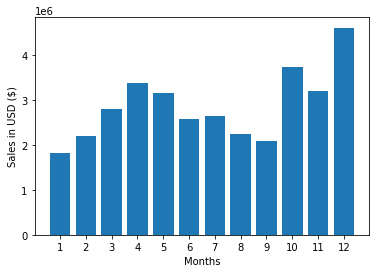

In [16]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.ylabel("Sales in USD ($)")
plt.xlabel("Months")
plt.show()

**So the month December has the most sales**

#### What city has the highest number of Sales?

##### Task 4: Add city column

In [17]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

alldata['City'] = alldata['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Displaying the graph

In [18]:
citysale = alldata.groupby('City').sum()

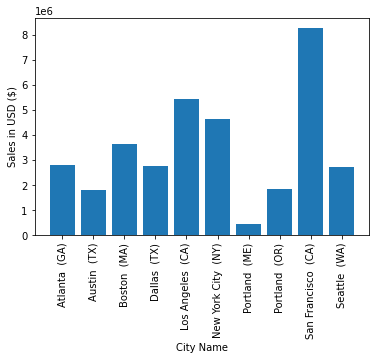

In [19]:
cityname = list(citysale.index)
plt.bar(cityname, citysale['Sales'])
plt.xticks(cityname, rotation = 'vertical')
plt.ylabel("Sales in USD ($)")
plt.xlabel("City Name")
plt.show()

***From the Graph it is clear that San Francisco (CA) has the most in sales***

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

#### Adding hour and minute column

In [20]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [21]:
alldata['Hour'] = pd.to_datetime(alldata['Order Date']).dt.hour
alldata['Minute'] = pd.to_datetime(alldata['Order Date']).dt.minute
alldata ['Count'] = 1
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


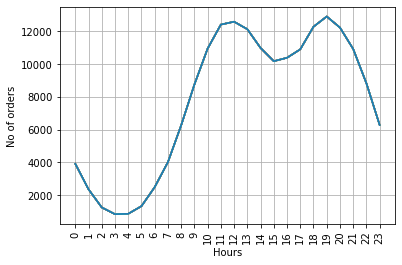

In [22]:
hours = [hour for hour, df in alldata.groupby('Hour')]
plt.plot(hours,alldata.groupby(['Hour']).count())
plt.xticks(hours, rotation= 'vertical', size = 10)
plt.grid()
plt.ylabel("No of orders")
plt.xlabel("Hours")
plt.show()

***My recommendation is slightly before 11am or 7pm***

#### Question 4: What products are most often sold together?

In [23]:
#Keeping only data that has order id dupicated
df = alldata[alldata['Order ID'].duplicated(keep=False)] 

#Creating a new column by joining the products under the same Order ID
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

#Deleting the duplicate rows with the same Order ID and Grouped
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-23-683ff9e87da9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [24]:
#Counting the most repeated no. of combination in 

# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

for key,value in count.most_common(10):
    print(key, value)
    


('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


***The most common 3 products brought together is: Google Phone, USB-C Charging Cable and Wired Headphones***

#### What product sold the most? Why do you think it sold the most?

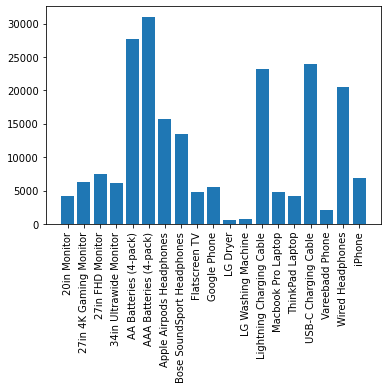

In [25]:
productgroup = alldata.groupby('Product')
quantityordered = productgroup.sum()['Quantity Ordered']

keys = [pair for pair, df in productgroup]
plt.bar(keys, quantityordered)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

<ipython-input-26-91c85962ccc3>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=10)
<ipython-input-26-91c85962ccc3>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


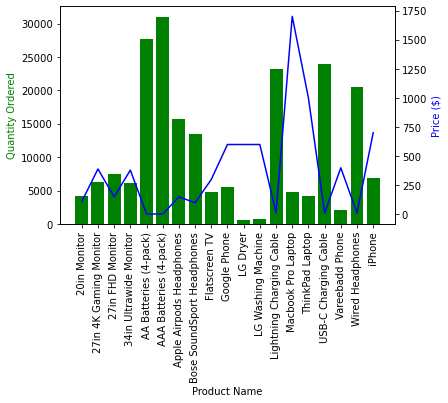

In [26]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = alldata.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantityordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=10)

fig.show()

***From the graph it is shown that AAA Batteries were ordered higher than any product. The reason might be because of the requirment of the AAA Batteries is more than any other products and it's expiration might be faster than other products and is cheaper than other products.***